# Store US Stock Prices in HDF5 Format

## Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
idx = pd.IndexSlice

## Load source data

In [3]:
df = pd.read_csv('../data/us_stocks.csv', 
                 parse_dates=['date'], 
                 index_col=['ticker', 'date'])

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15389314 entries, ('A', Timestamp('1999-11-18 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 12 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   open         15388776 non-null  float64
 1   high         15389259 non-null  float64
 2   low          15389259 non-null  float64
 3   close        15389313 non-null  float64
 4   volume       15389314 non-null  float64
 5   ex-dividend  15389314 non-null  float64
 6   split_ratio  15389313 non-null  float64
 7   adj_open     15388776 non-null  float64
 8   adj_high     15389259 non-null  float64
 9   adj_low      15389259 non-null  float64
 10  adj_close    15389313 non-null  float64
 11  adj_volume   15389314 non-null  float64
dtypes: float64(12)
memory usage: 1.4+ GB


In [5]:
df = (df.loc[idx[:, '2000':], :]
      .filter(like='adj')
      .rename(columns=lambda x: x.replace('adj_', ''))
      .dropna())

In [6]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11340944 entries, ('A', Timestamp('2000-01-03 00:00:00')) to ('ZUMZ', Timestamp('2018-03-26 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count     Dtype  
---  ------  --------------     -----  
 0   open    11340944 non-null  float64
 1   high    11340944 non-null  float64
 2   low     11340944 non-null  float64
 3   close   11340944 non-null  float64
 4   volume  11340944 non-null  float64
dtypes: float64(5)
memory usage: 476.0+ MB


In [27]:
symbol = 'AAPL'

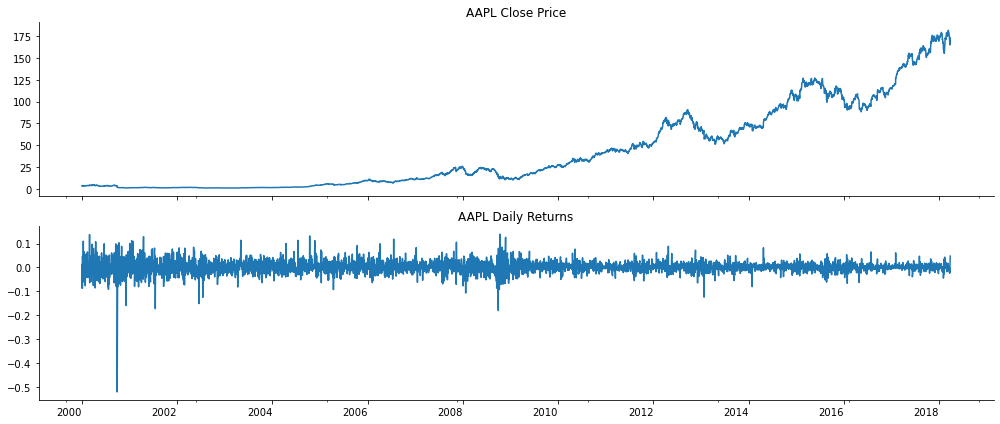

In [28]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 6), sharex=True)
s = df.loc[symbol, 'close']
s.plot(rot=0, ax=axes[0], title=f'{symbol} Close Price')
s.pct_change().plot(rot=0, ax=axes[1], title=f'{symbol} Daily Returns')
axes[1].set_xlabel('')
sns.despine()
fig.tight_layout()

## Store in HDF5 format

In [8]:
df.to_hdf('../data/stock_prices.h5', 'us_stocks')